In [1]:
from pybedtools import BedTool
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
bam_dir = '../bam'

## Characteristics of Lippold et al's capture design

In [5]:
lippold_regions = BedTool('../input/lippold_regions.bed')
len(lippold_regions)

3657

### Total length of target regions

In [6]:
lippold_regions.total_coverage()

433416

### Size distribution of target regions (all numbers in bp)

In [7]:
lengths = pd.Series(i.length for i in lippold_regions)

In [8]:
lengths.describe()

count    3657.000000
mean      118.516817
std       154.909832
min         1.000000
25%        27.000000
50%        72.000000
75%       139.000000
max      1560.000000
dtype: float64

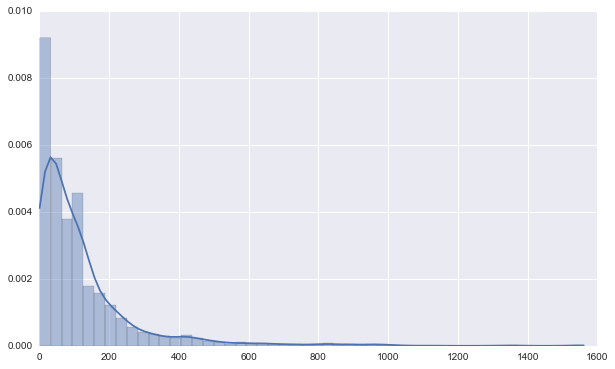

In [9]:
sns.distplot(lengths)

## Characteristics of exome (Y chromosome part) capture design

In [10]:
exome_regions = BedTool('../input/exome_regions.bed')
len(exome_regions)

387

### Total length of target regions

In [11]:
exome_regions.total_coverage()

155204

### Size distribution of target regions (all numbers in bp)

In [12]:
lengths = pd.Series(i.length for i in exome_regions)

In [13]:
lengths.describe()

count     387.000000
mean      401.043928
std       264.167929
min       206.000000
25%       275.000000
50%       314.000000
75%       386.500000
max      2696.000000
dtype: float64

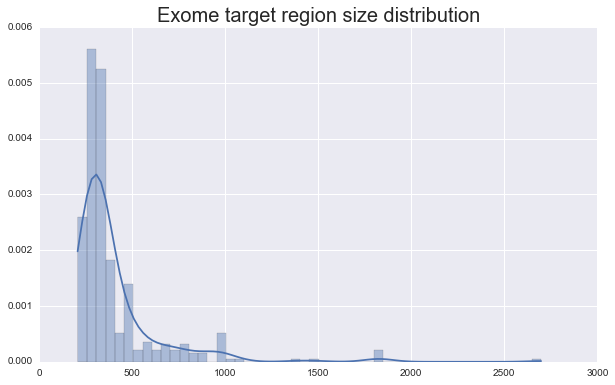

In [14]:
sns.distplot(lengths)
plt.title('Exome target region size distribution', fontsize=20)

In [15]:
def analyze_coverage(bam_file, target_regions):
    bam = BedTool(bam_file)
    cov = target_regions.coverage(bam, d=True).to_dataframe()
    
    print(bam_file, '\n========================================')
    print('Number of bases in target regions covered:', len(cov.query('score > 0')))
    print('Fraction of target regions covered:', (cov.score > 0).mean() * 100, '%')
    print('\nSummary of coverage at sites in target regions:\n')
    print(cov.score.describe())
    
    sns.distplot(cov.score, kde=False)
    plt.title('Coverage distribution', fontsize=20)
    plt.tick_params(labelsize=15)
    plt.xlabel('coverage', fontsize=20)
    plt.xlim(0, cov.score.max())

# El Sidron 570kb capture

## Proportion of on-target reads

In [16]:
on = ! samtools view ../bam/lippold_sidron.bam | wc -l
total = ! samtools view ../tmp/sidron_rmdup_len35mapq37_sorted.bam | wc -l

print('on-target read count: ', on[0])
print('total read count: ', total[0])
print(int(on[0]) / int(total[0]) * 100, '%')

on-target read count:  89488
total read count:  244170
36.64987508702953 %


../bam/lippold_sidron.bam 
Number of bases in target regions covered: 417931
Fraction of target regions covered: 96.427220038 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          8.639390
std           5.448468
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          53.000000
Name: score, dtype: float64


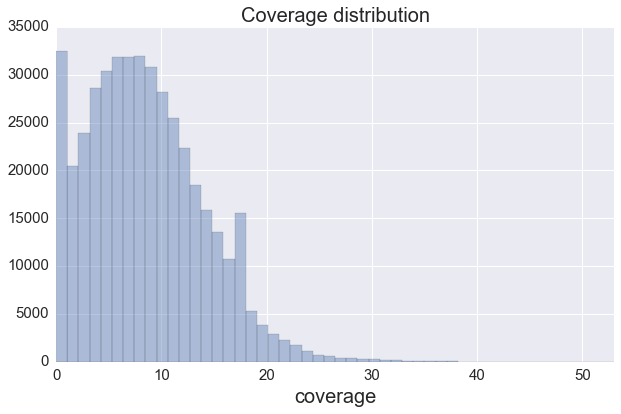

In [17]:
analyze_coverage('../bam/lippold_sidron.bam', lippold_regions)

# El Sidron exome capture

../bam/exome_sidron.bam 
Number of bases in target regions covered: 129917
Fraction of target regions covered: 83.7072498131 %

Summary of coverage at sites in target regions:

count    155204.000000
mean         24.428346
std          64.023322
min           0.000000
25%           1.000000
50%           6.000000
75%          15.000000
max         606.000000
Name: score, dtype: float64


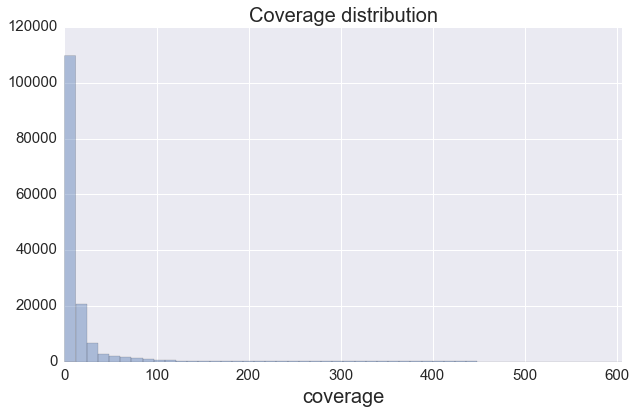

In [18]:
analyze_coverage('../bam/exome_sidron.bam', exome_regions)

# Mezmaiskaya 2

## Proportion of on-target reads

In [19]:
read_count = ! samtools view ../bam/lippold_mez2.bam | wc -l

print('on-target read count: ', read_count[0])

on-target read count:  10430


../bam/lippold_mez2.bam 
Number of bases in target regions covered: 246233
Fraction of target regions covered: 56.8121619876 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          0.900894
std           1.008160
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: score, dtype: float64


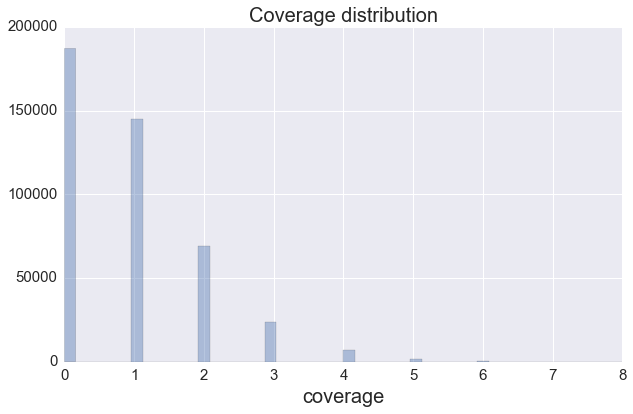

In [20]:
analyze_coverage('../bam/lippold_mez2.bam', lippold_regions)

# Spy

## Proportion of on-target reads

In [21]:
read_count = ! samtools view ../bam/lippold_spy.bam | wc -l

print('on-target read count: ', read_count[0])

on-target read count:  5924


../bam/lippold_spy.bam 
Number of bases in target regions covered: 156067
Fraction of target regions covered: 36.008592207 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          0.468571
std           0.721053
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: score, dtype: float64


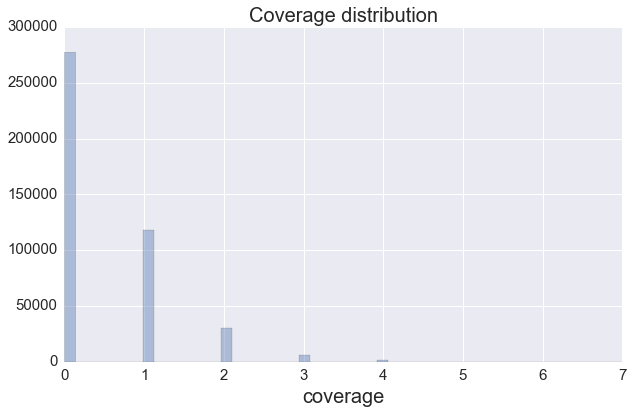

In [22]:
analyze_coverage('../bam/lippold_spy.bam', lippold_regions)

# A00 Y chromosome data -- GRC13292545

../bam/lippold_a00_1.bam 
Number of bases in target regions covered: 432881
Fraction of target regions covered: 99.8765620097 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          9.149976
std           3.827119
min           0.000000
25%           6.000000
50%           9.000000
75%          11.000000
max          32.000000
Name: score, dtype: float64


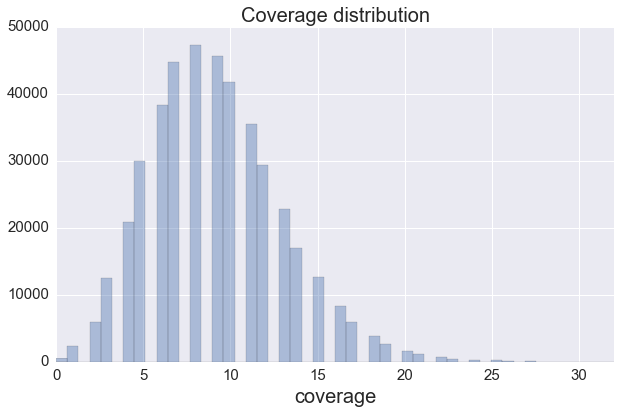

In [23]:
analyze_coverage('../bam/lippold_a00_1.bam', lippold_regions)

# A00 Y chromosome data -- GRC13292546

../bam/lippold_a00_2.bam 
Number of bases in target regions covered: 433405
Fraction of target regions covered: 99.9974620226 %

Summary of coverage at sites in target regions:

count    433416.000000
mean         12.522613
std           4.420871
min           0.000000
25%           9.000000
50%          12.000000
75%          15.000000
max          47.000000
Name: score, dtype: float64


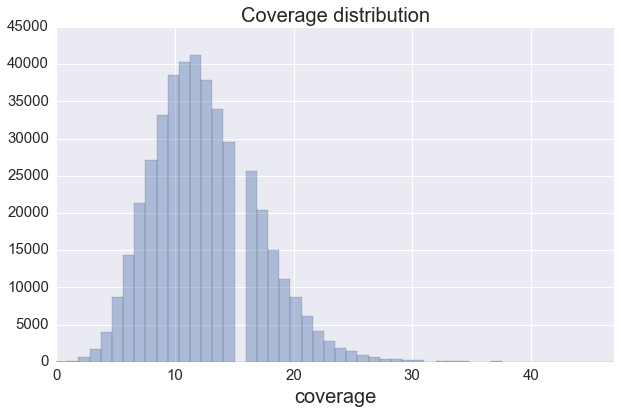

In [24]:
analyze_coverage('../bam/lippold_a00_2.bam', lippold_regions)

<br><br><br><br><br><br><br><br><br><br>
# Denisova 8 shotgun (all fragments)

In [25]:
read_count = ! samtools view ../bam/lippold_den8.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  517


../bam/lippold_den8.bam 
Number of bases in target regions covered: 16141
Fraction of target regions covered: 3.72413570334 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          0.039332
std           0.205181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: score, dtype: float64


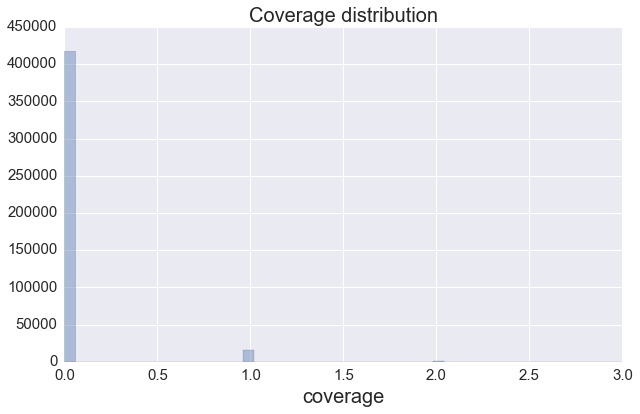

In [26]:
analyze_coverage('../bam/lippold_den8.bam', lippold_regions)

# Denisova 8 shotgun (damaged fragments only)

In [27]:
read_count = ! samtools view ../bam/lippold_deam_den8.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  97


../bam/lippold_deam_den8.bam 
Number of bases in target regions covered: 3144
Fraction of target regions covered: 0.725400077524 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          0.007254
std           0.084861
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


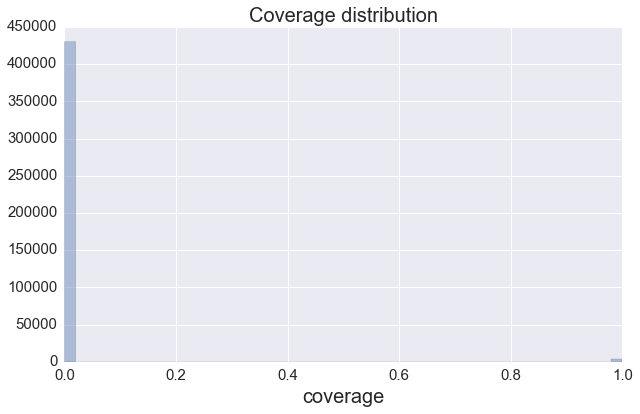

In [28]:
analyze_coverage('../bam/lippold_deam_den8.bam', lippold_regions)

# Denisova 4 shotgun (all fragments)

In [29]:
read_count = ! samtools view ../bam/lippold_den4.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  72


../bam/lippold_den4.bam 
Number of bases in target regions covered: 2880
Fraction of target regions covered: 0.664488620632 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          0.006825
std           0.084488
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: score, dtype: float64


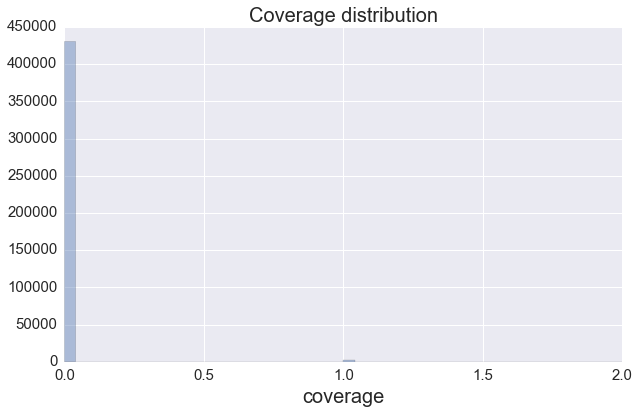

In [30]:
analyze_coverage('../bam/lippold_den4.bam', lippold_regions)

# Denisova 4 shotgun (damaged fragments only)

In [31]:
read_count = ! samtools view ../bam/lippold_deam_den4.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  3


../bam/lippold_deam_den4.bam 
Number of bases in target regions covered: 90
Fraction of target regions covered: 0.0207652693948 %

Summary of coverage at sites in target regions:

count    433416.000000
mean          0.000208
std           0.014409
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


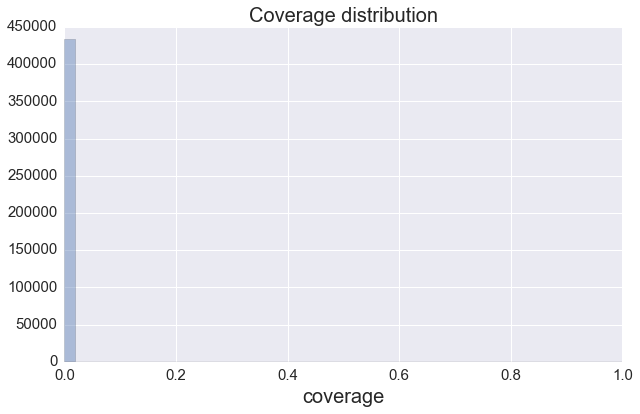

In [32]:
analyze_coverage('../bam/lippold_deam_den4.bam', lippold_regions)